# FACTOR APP 
**Author**: *`Rizal Aditya`* <br>

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/rzladitya/)](https://www.linkedin.com/in/rzladitya/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/hujikan2)](https://github.com/hujikan2)

---
## Context
Berita palsu sering digaungkan sebagai informasi yang salah di media sosial. Penting bagi kita untuk memiliki mekanisme untuk mendeteksi berita palsu, atau setidaknya, kesadaran bahwa tidak semua yang kita baca di media sosial dan situs web lain adalah benar. Berita palsu, memiliki potensi untuk membentuk opini dan memengaruhi keputusan. Maka dari itu, Muncul lah Proyek ini (FACTOR APP) yang dapat mendeteksi berita palsu dengan teknologi deep learning yang dapat mengklasifikasikan mana berita palsu dan mana berita asli. Proyek ini akan memberikan kontribusi kecil terhadap bahaya paling umum di zaman modern ini yaitu berita palsu.

## Dataset
**FAKE DATA**
  - Data : 23481 baris data
  - 4 kolom : title, text, subject, dan date

**TRUE DATA**
  - Data : 21417 baris data
  - 4 kolom : title, text, subject, dan date

## Assignment Objectives
*Assigment* ini dibuat guna memenuhi qualify dalam pembelajaran **Machine Learning wtih Tensorflow**:

- Mampu memahami penggunaan teknologi tensorflow
- Mampu mengimplementasikan tensoflow dalam mengerjakan proyek

# Import Library

In [157]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # regular expression
import string 


In [158]:
%matplotlib inline
sns.set(rc={
    'figure.figsize':(6.7, 5)
})

In [159]:
# Mount google drive file to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

In [160]:
# Import data from drive files
true_df = pd.read_csv("/content/drive/MyDrive/Assigment/DTS/fakenews/True.csv") # Loading true dataframe
fake_df = pd.read_csv("/content/drive/MyDrive/Assigment/DTS/fakenews/Fake.csv") # Loading fake dataframe

In [161]:
# Showing True dataframe and dimension and Fake dataframe and dimension
display(true_df.head(), true_df.shape, fake_df.head(), fake_df.shape)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


(21417, 4)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


(23481, 4)

Terlihat ada perbedaan dari sisi dataset fake dengan true dataframe.

Kita akan melakukan penggabungan terhadap dataset tersebut dan kita akan memberi label terhadap dataframe Fake dan True.

In [162]:
# Add label to track fake and real data
true_df['label'] = 'true'
fake_df['label'] = 'fake'

# And Concatenate fake data and true to dataframes
df_news = pd.concat([fake_df, true_df]).reset_index(drop = True)
df_news.shape # show dimension

(44898, 5)

Oke, kita sudah berhasil melakukan labeling and concatenate data fake dan true kedalam 1 dataframe.

Selanjutnya kita akan melakukan cleaning data.

In [163]:
# Showing for information about data
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


# Data Cleaning and Preparation

### Missing Value Checking

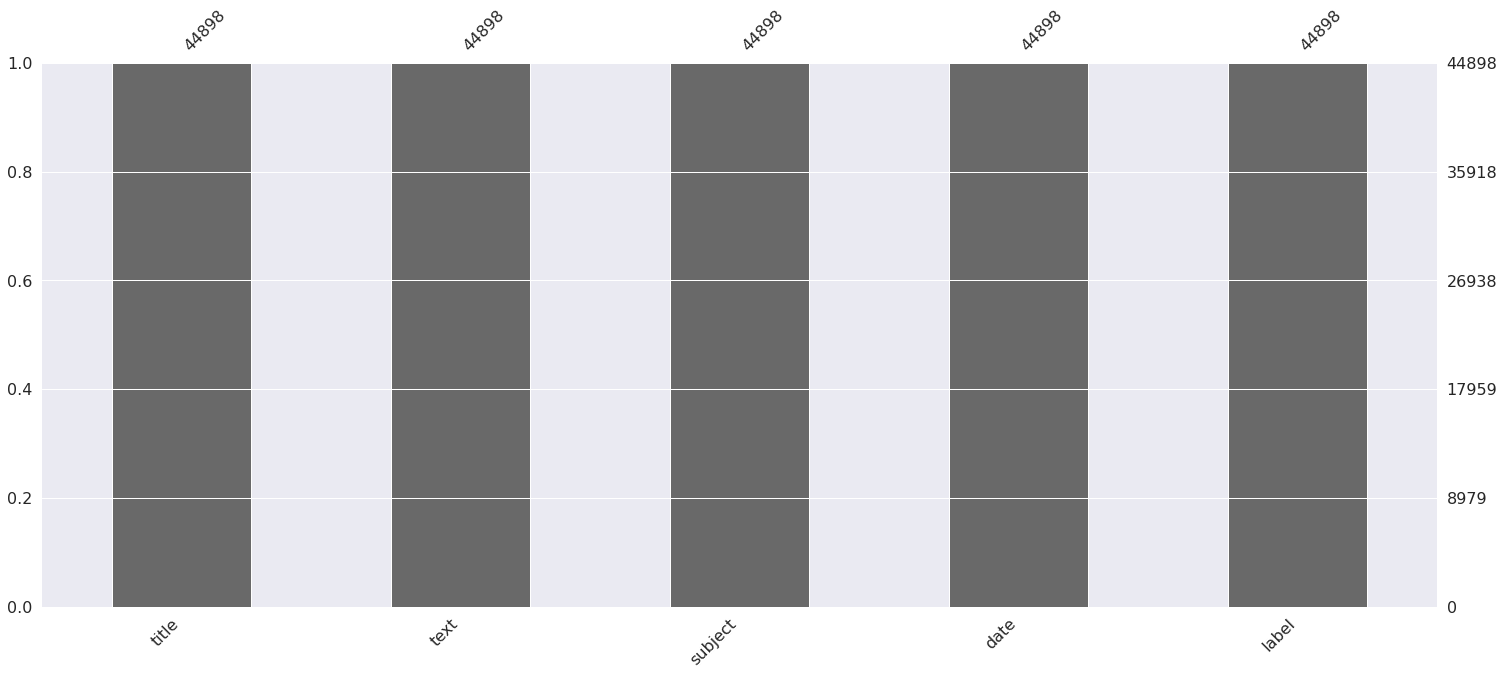

In [164]:
import missingno as msno

msno.bar(df_news)
plt.show()

Data look's good, but kita harus checking data lagi.

### Duplicated Data Checking

In [165]:
# Check Duplicate Data
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df_news[df_news.duplicated()]

print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
23926,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",true
24259,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",true
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


Nah, kita memiliki sebanyak 209 data duplicated, kita akan langsung melakukan drop terhadap data duplicated

In [166]:
# remove duplicate data
df_news.drop_duplicates(inplace=True)

In [167]:
# check whitespace.
df_news[df_news.text.str.isspace()] # checking in text data

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",fake


Ternyata ada nilai yang hilang pada kolom 'text', sehingga saya memutuskan untuk membuang data yang mengandung nilai yang hilang. Setelah dilihat ternyata banyak dari text yang kosong tersebut adalah Fake.


In [168]:
# Saya akan memisahkan data yang memiliki text dengan yang tidak
df_news = df_news[~df_news.text.str.isspace()]
df_news.reset_index(drop=True) # Reset index and drop index

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44053,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44054,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44055,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44056,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


Okay, data sudah dibersihkan dari duplicated dan missing data.
Sehingga kita akan masuk ke tahap berikutnya.

### Combining column values
Pada akhirnya, semua kolom teks akan dijadikan vektor, jadi saya memutuskan untuk menggabungkan kolom "title" dan "text".
<details>
<summary>translations</summary>
In the end, the all text column will be vectorized, so I decided to combine the "title" and "text" columns
</details>

In [169]:
# Concate title and text
df_news['content'] = df_news['title'] + " " + df_news['text']

In [170]:
# Uppercase
df_news['upper'] = df_news['content'].apply(lambda x: len([x for x in x.split() if x.isupper() and (len(x) > 1)]))

# Lowercase
df_news['lower'] = df_news['content'].apply(lambda x: len([x for x in x.split() if x.islower()]))


### Remove punctuation

In [171]:
# Punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

df_news['punctuation'] = df_news['content'].apply(lambda x: count_punct(x))

# Hastag
df_news['hastags'] = df_news['content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

# Numbers / Digits
df_news['numerics'] = df_news['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))


### Remove Stopwords

In [172]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# stopwords
try:
  stop_words = set(stopwords.words("english"))
except:
  nltk.download('stopwords')
  stop_words = set(stopwords.words("english"))

# remove the stopwords and single-character words
def remove_sw_and_sc(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop_words and len(i) > 1:
            final_text.append(i.strip())
    return " ".join(final_text)

# combine all functions above
def clean_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('http\S+|\S+\.com\S+|bit.ly\S+', '', text) # remove url
    text = re.sub(r'\@\S+', '', text) # remove mention
    text = re.sub('[‘’“”…]', '', text) # remove other punctuation
    text = remove_sw_and_sc(text)
    return text

# apply function on review column
df_news['content'] = df_news['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
# Number of Words
df_news['word_count'] = df_news['content'].apply(lambda x: len(str(x).split(" ")))

In [174]:
# Number of Character
df_news['char_count'] = df_news['content'].str.len()

In [175]:
# Average Words
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/(len(words)+0.000001))

df_news['avg_word'] = df_news['content'].apply(lambda x: avg_word(x)).round(1)

In [176]:
# Cek data
df_news.head()

,title,text,subject,date,label,content,upper,lower,punctuation,hastags,numerics,word_count,char_count,avg_word
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,donald trump sends embarrassing new years eve ...,2,348,122,0,4,256,1800,6.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,drunk bragging trump staffer started russian c...,3,225,39,0,0,186,1452,6.8
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,sheriff david clarke becomes internet joke thr...,32,414,148,3,0,312,2274,6.3
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,trump obsessed even obamas name coded website ...,5,339,120,0,5,243,1733,6.1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,pope francis called donald trump christmas spe...,0,358,40,0,0,218,1518,6.0


# Basic Data Exploratory

In [177]:
# ringkasan statistik dari teks berita palsu
df_news[df_news.label == 'fake'].describe()

,upper,lower,punctuation,hastags,numerics,word_count,char_count,avg_word
count,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000
mean,9.875306,350.037640,62.652661,0.338454,1.807948,245.019214,1839.407957,6.442166
std,11.834064,332.913916,82.304659,1.338197,3.339563,228.004754,1776.135850,0.412083
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,199.000000,34.000000,0.000000,0.000000,148.000000,1092.750000,6.200000
50%,7.000000,298.000000,50.000000,0.000000,1.000000,207.000000,1544.000000,6.400000
75%,12.000000,415.000000,73.000000,0.000000,2.000000,284.000000,2130.250000,6.700000
max,307.000000,6603.000000,7295.000000,43.000000,118.000000,4827.000000,38676.000000,19.600000


In [178]:
# ringkasan statistik dari teks berita palsu
df_news[df_news.label == 'true'].describe()

,upper,lower,punctuation,hastags,numerics,word_count,char_count,avg_word
count,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000,21210.000000
mean,6.128996,313.805139,52.118576,0.018859,2.392221,233.553890,1769.012777,6.572489
std,6.231227,224.015800,36.846934,0.254569,3.011444,158.546112,1200.973207,0.320075
min,0.000000,13.000000,4.000000,0.000000,0.000000,21.000000,143.000000,5.000000
25%,2.000000,119.000000,22.000000,0.000000,0.000000,94.000000,709.000000,6.400000
50%,4.000000,292.000000,46.000000,0.000000,1.000000,217.000000,1648.000000,6.600000
75%,8.000000,429.000000,70.000000,0.000000,3.000000,312.000000,2373.000000,6.800000
max,208.000000,4397.000000,595.000000,14.000000,72.000000,2353.000000,17593.000000,8.400000


Beberapa hal yang menarik yang ditemukan dari statistik adalah,
- Berita palsu lebih banyak menggunakan huruf besar dan hastag dibandingkan berita asli. Saya menduga sebagian besar berita palsu menggunakan huruf besar sebagai penekanan atau membuat berita terlihat lebih heboh. Sedangkan, penggunaan hastag agar berita lebih mudah tersebar,
- Berita asli lebih banyak menggunakan angka dibandingkan berita palsu. Saya menduga berita asli menggunakan banyak kutipan dan data angka untuk memberikan informasi berdasarkan data.

subject
Government News     1498
Middle-east          778
News                9050
US_News              783
left-news           4309
politics            6430
politicsNews       11219
worldnews           9991
Name: text, dtype: int64


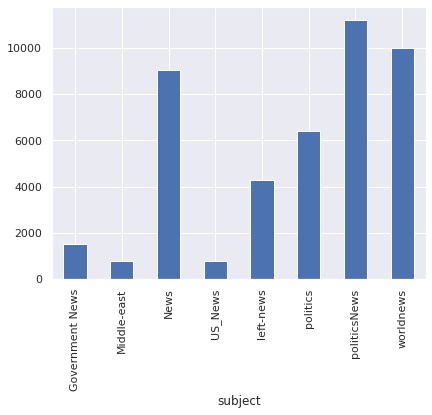

In [179]:
# How many articles per subject ?
print(df_news.groupby(['subject'])['text'].count())
df_news.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Yang memiliki subject berita terbnyak pada data ini adalah pilitcsNews, dan worldnews. Karena kalau dilihat dari informasi datanya, data ini diambil pada tahun 2017 dimana pada saat itu Amerika Serikat sedang melakukan pemilihan presiden. Sehingga berita yang mendominasi adalah politik.

Dilihat dari tipe subject beritanya bahwa Ada subject yang sama tetapi penulisannya berbeda. Coba kita periksa kolom 'subject' berdasarkan label.

In [180]:
# using groupby for comparison
df_news.groupby(['label', 'subject']).count()

title   text   date  content  upper  lower  \
label subject                                                       
fake  Government News   1498   1498   1498     1498   1498   1498   
      Middle-east        778    778    778      778    778    778   
      News              9050   9050   9050     9050   9050   9050   
      US_News            783    783    783      783    783    783   
      left-news         4309   4309   4309     4309   4309   4309   
      politics          6430   6430   6430     6430   6430   6430   
true  politicsNews     11219  11219  11219    11219  11219  11219   
      worldnews         9991   9991   9991     9991   9991   9991   

                       punctuation  hastags  numerics  word_count  char_count  \
label subject                                                                   
fake  Government News         1498     1498      1498        1498        1498   
      Middle-east              778      778       778         778         778   
      News                    9050     9050      9050        9050        9050   
      US_News                  783      783       783         783         783   
      left-news               4309     4309      4309        4309        4309   
      politics                6430     6430      6430        6430        6430   
true  politicsNews           11219    11219     11219       11219       11219   
      worldnews               9991     9991      9991        9991        9991   

                       avg_word  
label subject                    
fake  Government News      1498  
      Middle-east           778  
      News                 9050  
      US_News               783  
      left-news            4309  
      politics             6430  
true  politicsNews        11219  
      worldnews            9991

Ternyata masing-masing data berita asli dan palsu memiliki kategori berita yang berbeda. Hal ini wajar karena masing-masing data diambil dari sumber yang berbeda. Oleh karena itu, saya tidak menggunakan kolom 'subject'.

Saya juga tidak membutuhkan kolom 'date', sehingga saya memutuskan untuk menghapus kedua kolom tersebut.

label
fake    22848
true    21210
Name: text, dtype: int64


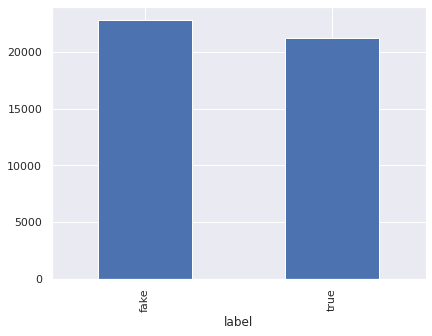

In [181]:
# How many fake and real articles?
print(df_news.groupby(['label'])['text'].count())
df_news.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

Terlihat data fake lebih sedikit lebih banyak dibandingkan dengan true data. Dan dilihat dari distribusinya ini masih tergolong balance dan kita tidak menghawatirkan untuk melakukan imbalance data.

In [182]:
# Most frequent words 
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

# Create function for counter the word
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

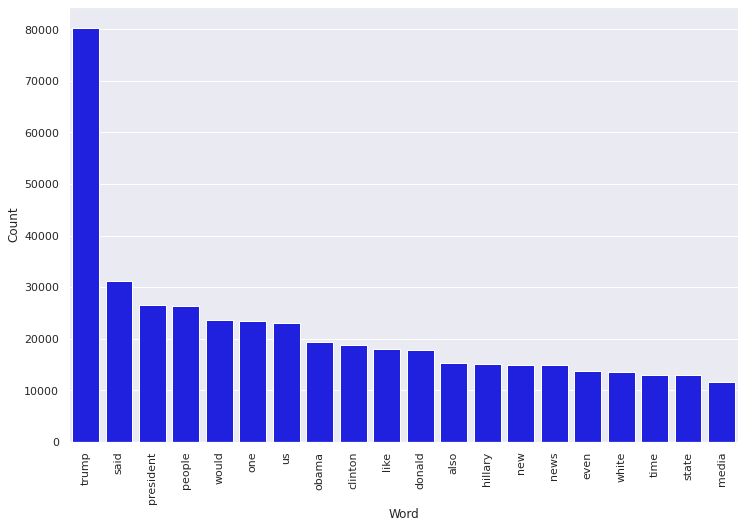

In [183]:
# Most frequent words in fake news
counter(df_news[df_news["label"] == "fake"], "content", 20)

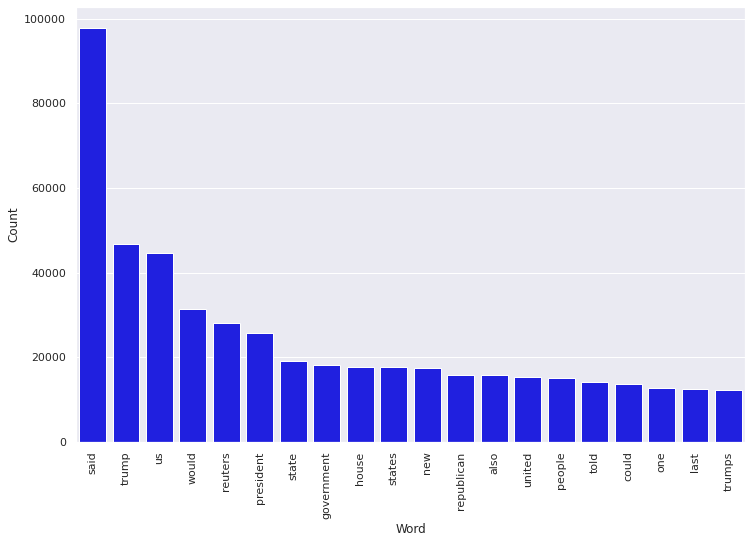

In [184]:
# Most frequent words in real news
counter(df_news[df_news["label"] == "true"], "content", 20)

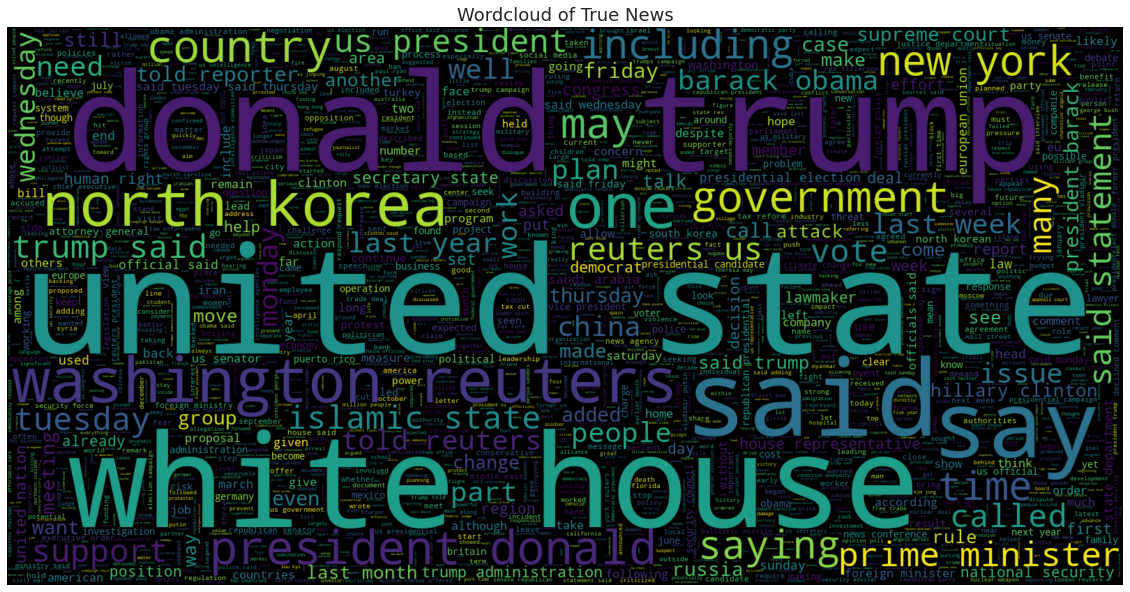

In [185]:
# visualisasi wordcloud berita asli 
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_news.loc[df_news.label == 'true', 'content']))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Wordcloud of True News", fontsize=18, fontweight=True)
plt.grid(False)
plt.axis('off')
plt.show()

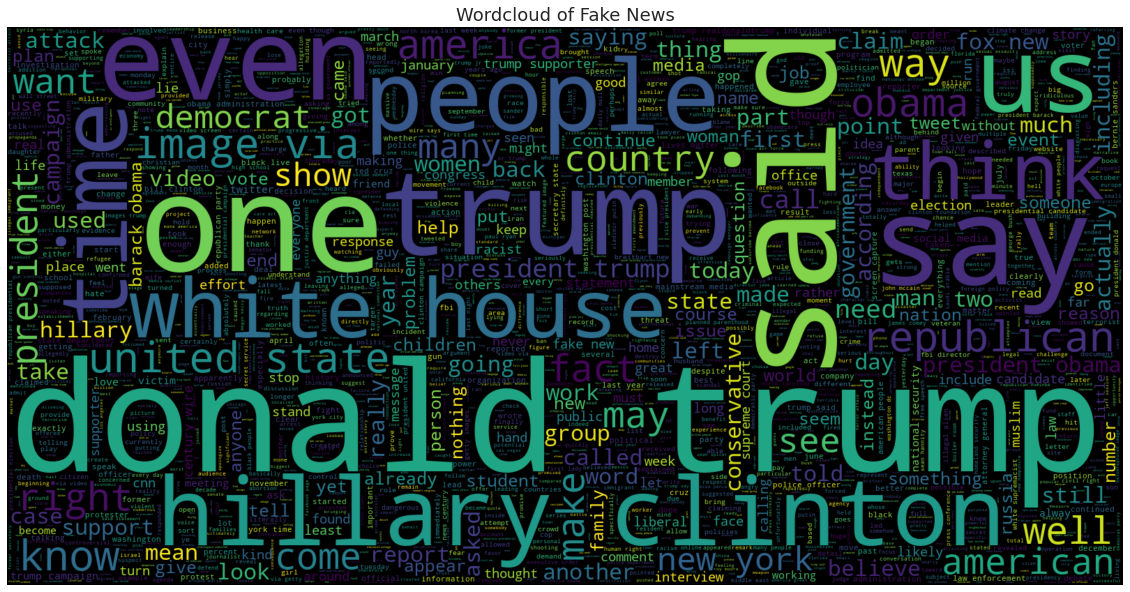

In [186]:
# visualisasi wordcloud berita fake 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_news.loc[df_news.label == 'fake', 'content']))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Wordcloud of Fake News", fontsize=18, fontweight=True)
plt.grid(False)
plt.axis('off')
plt.show()

Sebagian besar dari kata-kata yang sering muncul pada berita asli dan palsu adalah "Donald Trump","said", dan "say". Hal ini wajar karena sebagian besar berita berisi tentang politik dan data dikumpulkan saat proses pemilu Amerika Serikat pada tahun 2016.

Pada wordcloud berita asli, salah satu kata yang sering muncul adalah "reuters", sedangkan Reuters adalah salah satu nama portal berita. Dan ini valid bahwa berita asli dari media "routers"

# Prepocessing Data

### Splitting dataset

In [187]:
from sklearn.model_selection import train_test_split

# Define dependent and independent fitur
X = df_news.content # X get the content data
y = df_news['label'].replace(('fake', 'true'), (1, 0)) # y get the label target

# Splitting to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 31)
# Splitting train data to validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 31)
print('Jumlah data train:', X_train.shape[0])
print('Jumlah data test:', X_test.shape[0])
print('Jumlah data validation:', X_val.shape[0])

Jumlah data train: 28196
Jumlah data test: 8812
Jumlah data validation: 7050


In [188]:
# perkiraan jumlah kosa kata 
print("Jumlah kosa kata:", len(set(X_train.str.cat(sep=' ').split())))

Jumlah kosa kata: 165078


In [189]:
# jumlah kata terbanyak dalam satu data
print("Jumlah kata terbanyak dalams satu berita:", X_train.str.split().str.len().max())

Jumlah kata terbanyak dalams satu berita: 4827


### Tokenizer

In [190]:
# setup text vect
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000
max_length = 300

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize=None,
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)
text_vectorization.adapt(X_train)

In [191]:
# jumlah kosa kata setelah tokenisasi
print("Jumlah kosa kata setelah tokenisasi:", len(text_vectorization.get_vocabulary()))

Jumlah kosa kata setelah tokenisasi: 10000


In [192]:
# Create pipeline preprocessing data
def df_to_dataset(features, labels, shuffle=True, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(features))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

train_ds = df_to_dataset(X_train, y_train, batch_size=256)
val_ds = df_to_dataset(X_val, y_val, shuffle=False, batch_size=256)
test_ds = df_to_dataset(X_test, y_test, shuffle=False, batch_size=256)

# Modeling

Okay selanjutya adalah tahap pemodelan.

Disini saya akan mencoba menggunakan beberapa model :
1. Dummy model (baseline model) acuan model
2. Machine Learning model (MultinomialNB)
3. Model Deep Learning
  1. DL
  2. GRU
  3. LSTM

### Dummy Model

In [193]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy = 'stratified', random_state = 3)

### ML Model (MultinomialNB)

In [194]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

### DL Model (GlobalAberagePooling1D)

In [195]:
from keras.layers import Embedding
embedding = Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

In [196]:
# deep learning model 1
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name="GAPooling_model")
model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_1.summary()

Model: "GAPooling_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 300)              0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 global_average_pooling1d_5   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129

### LSTM Model

In [197]:
# deep learning model 2 - LSTM
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
                                         
model_2 = tf.keras.Model(inputs, outputs, name="LSTM_model")
model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_2.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 300)              0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                        

### GRU Model


In [198]:
# deep learning model 3 - GRU
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(128)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
                                         
model_3 = tf.keras.Model(inputs, outputs, name="GRU_model")
model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_3.summary()

Model: "GRU_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 300)              0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 gru_6 (GRU)                 (None, 64)                37248     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                         

# Training and Evaluate Models

In [199]:
# membuat dataframe untuk membandingkan hasil setiap model
results_df = pd.DataFrame(
    columns=['F1 Score', 'Accuracy'],
    index=['Dummy Classifier', 'Naive Bayes', 'DL Model', 'Model LSTM', 'Model GRU']
)

In [200]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# fungsi melakukan training pada model dan hasilnya
def modeling(Model, Xtrain, Xtest):
    model = Model
    model.fit(Xtrain, y_train)
    y_pred = model.predict(Xtest)
    return y_pred

# fungsi membuat confusion matrix
def conf_matrix(model_names, y_test, y_pred):
    plt.figure(figsize=(6, 6))
    plt.title(f'Confusion Matrix of {model_names}')
    ax = plt.subplot()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g', cmap=plt.cm.Blues)
    ax.set_xlabel('Label Prediksi')
    ax.set_ylabel('Label Aktual')
    plt.show()

# fungsi menunjukkan hasil pelatihan model
def model_results(names, y_pred, y_test=y_test):
    score = f1_score(y_test, y_pred)
    accscore = accuracy_score(y_test, y_pred)
    results_df.loc[names, 'F1 Score'] = score
    results_df.loc[names, 'Accuracy'] = accscore
    
    print(f'----------   {names}   ----------')
    print("f1 score:", score)
    print("acc score:", accscore)
    print()
    conf_matrix(names, y_test, y_pred)
    print()
    print('Classification Report:')
    print('-------------------------------------')
    print(classification_report(y_test, y_pred))

### Dummy Classifie

In [201]:
# Dummy Classifier
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
f1score = f1_score(y_test, y_pred)
accscore = accuracy_score(y_test, y_pred)
results_df.loc['Dummy Classifier', 'F1 Score'] = f1score
results_df.loc['Dummy Classifier', 'Accuracy'] = accscore
    
# Printing evaluation metric (f1-score) 
print("f1 score:", f1score)
print("accuracy score:", accscore)


f1 score: 0.517790875354726
accuracy score: 0.49863822060826146


### ML Model (MultinomialNB)

----------   Naive Bayes   ----------
f1 score: 0.9582730610882386
acc score: 0.9574443940081707



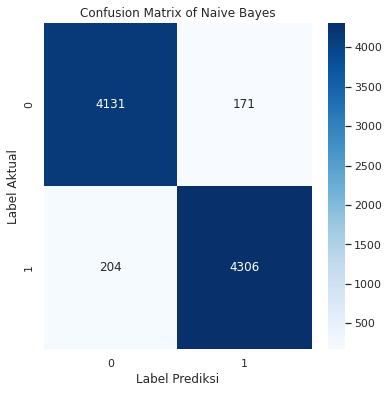


Classification Report:
-------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4302
           1       0.96      0.95      0.96      4510

    accuracy                           0.96      8812
   macro avg       0.96      0.96      0.96      8812
weighted avg       0.96      0.96      0.96      8812



In [202]:
# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

model_results('Naive Bayes', modeling(mnb, X_train_vec, X_test_vec))

### DL Model

In [203]:
# Training model
model_1_hist = model_1.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
111/111 [==============================] - 3s 18ms/step - loss: 0.6083 - accuracy: 0.8381 - val_loss: 0.4864 - val_accuracy: 0.9061
Epoch 2/20
111/111 [==============================] - 2s 17ms/step - loss: 0.3736 - accuracy: 0.9299 - val_loss: 0.2893 - val_accuracy: 0.9438
Epoch 3/20
111/111 [==============================] - 2s 17ms/step - loss: 0.2389 - accuracy: 0.9524 - val_loss: 0.2038 - val_accuracy: 0.9606
Epoch 4/20
111/111 [==============================] - 2s 17ms/step - loss: 0.1751 - accuracy: 0.9661 - val_loss: 0.1576 - val_accuracy: 0.9658
Epoch 5/20
111/111 [==============================] - 2s 17ms/step - loss: 0.1369 - accuracy: 0.9737 - val_loss: 0.1282 - val_accuracy: 0.9749
Epoch 6/20
111/111 [==============================] - 2s 18ms/step - loss: 0.1112 - accuracy: 0.9791 - val_loss: 0.1082 - val_accuracy: 0.9782
Epoch 7/20
111/111 [==============================] - 2s 17ms/step - loss: 0.0926 - accuracy: 0.9826 - val_loss: 0.0935 - val_accuracy: 0.9811

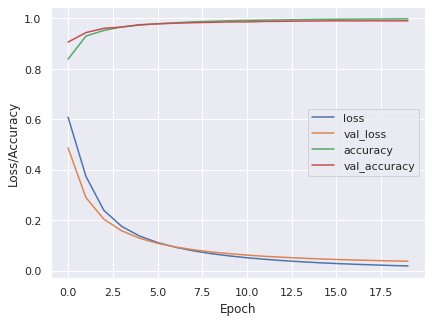

In [204]:
# Show plot history training
metrics = pd.DataFrame(model_1_hist.history)
metrics[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show()

----------   DL Model   ----------
f1 score: 0.9907802394385578
acc score: 0.9904964539007092



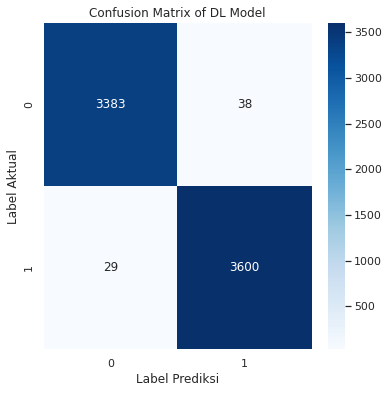


Classification Report:
-------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3421
           1       0.99      0.99      0.99      3629

    accuracy                           0.99      7050
   macro avg       0.99      0.99      0.99      7050
weighted avg       0.99      0.99      0.99      7050



In [205]:
# show evaluate model and predict using validationd data
yval_pred = model_1.predict(X_val)
model_results('DL Model', np.round(yval_pred), y_val)

### LSTM Model

In [206]:
# Training model
model_2_hist = model_2.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
111/111 [==============================] - 7s 40ms/step - loss: 0.2571 - accuracy: 0.8926 - val_loss: 0.1409 - val_accuracy: 0.9641
Epoch 2/20
111/111 [==============================] - 4s 35ms/step - loss: 0.1228 - accuracy: 0.9719 - val_loss: 0.1462 - val_accuracy: 0.9643
Epoch 3/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0831 - accuracy: 0.9823 - val_loss: 0.0867 - val_accuracy: 0.9826
Epoch 4/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0702 - accuracy: 0.9860 - val_loss: 0.1532 - val_accuracy: 0.9610
Epoch 5/20
111/111 [==============================] - 4s 35ms/step - loss: 0.1146 - accuracy: 0.9732 - val_loss: 0.1388 - val_accuracy: 0.9662
Epoch 6/20
111/111 [==============================] - 4s 35ms/step - loss: 0.1872 - accuracy: 0.9522 - val_loss: 0.1186 - val_accuracy: 0.9725
Epoch 7/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0610 - accuracy: 0.9880 - val_loss: 0.1117 - val_accuracy: 0.9743

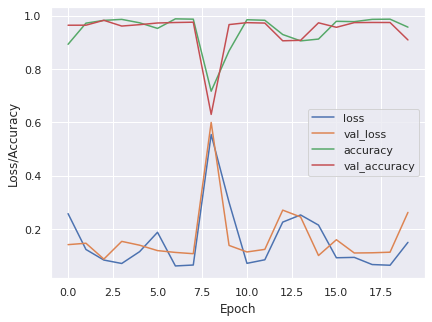

In [207]:
# Show plot history training
metrics = pd.DataFrame(model_2_hist.history)
metrics[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show()

----------   Model LSTM   ----------
f1 score: 0.9185692541856926
acc score: 0.908936170212766



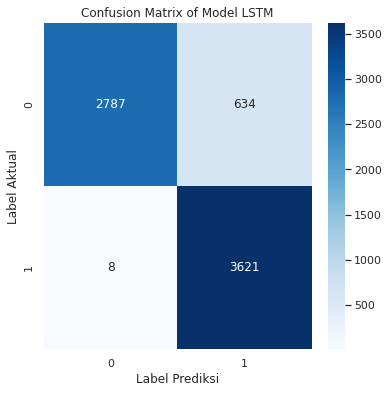


Classification Report:
-------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      3421
           1       0.85      1.00      0.92      3629

    accuracy                           0.91      7050
   macro avg       0.92      0.91      0.91      7050
weighted avg       0.92      0.91      0.91      7050



In [208]:
# show evaluate model and predict using validationd data
yval_pred = model_2.predict(X_val)
model_results('Model LSTM', np.round(yval_pred), y_val)

### GRU Model

In [209]:
# Training Model
model_3_hist = model_3.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
111/111 [==============================] - 7s 47ms/step - loss: 0.3481 - accuracy: 0.8467 - val_loss: 0.1904 - val_accuracy: 0.9485
Epoch 2/20
111/111 [==============================] - 4s 33ms/step - loss: 0.1392 - accuracy: 0.9622 - val_loss: 0.2605 - val_accuracy: 0.9055
Epoch 3/20
111/111 [==============================] - 4s 33ms/step - loss: 0.1361 - accuracy: 0.9623 - val_loss: 0.1227 - val_accuracy: 0.9718
Epoch 4/20
111/111 [==============================] - 4s 33ms/step - loss: 0.3318 - accuracy: 0.8483 - val_loss: 0.2329 - val_accuracy: 0.9223
Epoch 5/20
111/111 [==============================] - 4s 34ms/step - loss: 0.2466 - accuracy: 0.9261 - val_loss: 0.2094 - val_accuracy: 0.9309
Epoch 6/20
111/111 [==============================] - 4s 33ms/step - loss: 0.1364 - accuracy: 0.9555 - val_loss: 0.1548 - val_accuracy: 0.9521
Epoch 7/20
111/111 [==============================] - 4s 33ms/step - loss: 0.0859 - accuracy: 0.9728 - val_loss: 0.1315 - val_accuracy: 0.9603

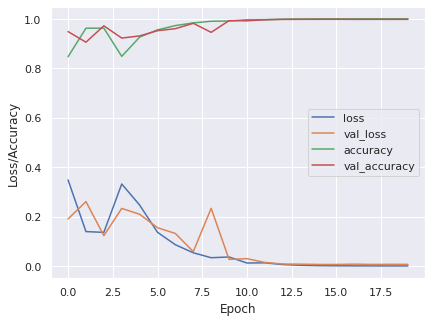

In [210]:
# Show plot history training
metrics = pd.DataFrame(model_3_hist.history)
metrics[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show()

----------   Model GRU   ----------
f1 score: 0.9980710939652797
acc score: 0.9980141843971632



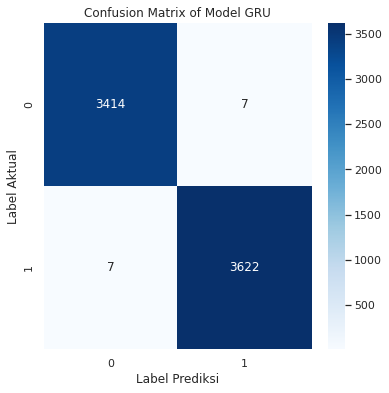


Classification Report:
-------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3421
           1       1.00      1.00      1.00      3629

    accuracy                           1.00      7050
   macro avg       1.00      1.00      1.00      7050
weighted avg       1.00      1.00      1.00      7050



In [211]:
# show evaluate model and predict using validationd data
yval_pred = model_3.predict(X_val)
model_results('Model GRU', np.round(yval_pred), y_val)

In [213]:
# Show and comparison hasil evaluate model
results_df

,F1 Score,Accuracy
Dummy Classifier,0.517791,0.498638
Naive Bayes,0.958273,0.957444
DL Model,0.99078,0.990496
Model LSTM,0.918569,0.908936
Model GRU,0.998071,0.998014


- Jika dibandingkan dengan baseline model dan model Naive Bayes, hasil dari model deep learning menunjukkan hasil yang lebih baik.
- Model GRU menunjukkan hasil yang terbaik di antara lain. Grafik loss antara data train dan validation juga tidak jauh berbeda. Hal ini menunjukkan bahwa model GRU tidak overfitting.

Selanjutnya kita coba model GRU (model terbaik) pada data test. Apakah model masih bisa memprediksi dengan hasil yang baik?

----------   Model GRU   ----------
f1 score: 0.9984482376413213
acc score: 0.998411257376305



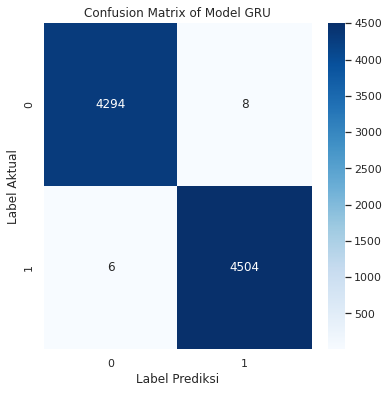


Classification Report:
-------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4302
           1       1.00      1.00      1.00      4510

    accuracy                           1.00      8812
   macro avg       1.00      1.00      1.00      8812
weighted avg       1.00      1.00      1.00      8812



In [215]:
ytest_pred = model_3.predict(X_test)
model_results('Model GRU', np.round(ytest_pred), y_test)

Model GRU mampu memprediksi data tes dengan tingkat akurasi 99,84%. Bahkan, hasil akurasinya sedikit lebih baik dibandingkan prediksi data validasi. Saya menganggap model GRU sudah baik untuk digunakan.

# Model Saving


In [233]:
!mkdir -p saved_model
model_3.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
#FIXED:ZIP AND UPLOAD FOLDER TO DRIVE 
!pip install -U -q PyDrive

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os
import sys

zipname = 'saved_model'

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.ZIP', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[0:])

zipfolder(zipname, '/content/saved_model')

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Create & upload a file text file.
file1 = drive.CreateFile()
file1.SetContentFile(zipname+".ZIP")
file1.Upload()

# Load Model

In [234]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/saved_model/my_model')

# Show the model architecture
new_model.summary()

Model: "GRU_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 300)              0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 gru_6 (GRU)                 (None, 64)                37248     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                         

# Model Inference
Data yang digunakan untuk pelatihan adalah data tahun 2016-2017. Sehingga, saya mencoba untuk menggunakan data berita asli dan palsu terbaru, untuk menguji kemampuan model dengan data terbaru. 

In [248]:
# truthful news
# https://www.reuters.com/world/us/hats-flags-deafening-cheers-conservative-gathering-consecrates-trump-2022-02-28/
sample_news1 = """
Trump consecrated at conservative gathering
ORLANDO, Florida, Feb 28 (Reuters) - At a large weekend gathering of conservatives in Florida, attendees browsed a sea of merchandise emblazoned with "Trump": Pink cowboy hats, sparkly purses, and T-shirts touting him as the 2024 presidential candidate.

But buried within the brassy rows of Trump merchandise at The MAGA Mall store were hats touting another figure: Florida's Republican Governor Ron DeSantis, who is seen as a potential 2024 rival to former President Donald Trump, who has hinted repeatedly that he wants to run again.

DeSantis is the only governor for whom Ronald Solomon, owner of The MAGA Mall, says he sells merchandise. Yet, if the store's sales are predictive of political wins, Trump need not fret. For every DeSantis hat sold, Solomon said he sells around 50 featuring Trump.

"It's Trump's party," Solomon said of the Republican Party as he attended to a group of young women at his stall at the Conservative Political Action Conference (CPAC), a get-together of American right-wing notables, in Orlando, more famous as the home of the Walt Disney World theme park.

That was unquestionably the maxim at the four-day CPAC gathering that ended on Sunday, according to interviews with more than a dozen Republican voters, right-wing media figures and conservative pundits who professed support for the former president.

Trump spoke to a rapturous crowd on Saturday, underlining his hold over the Republican base ahead of November's congressional elections.

Slightly improving his results from last year's poll at the Orlando gathering, Trump received 59% of support in a straw poll on possible 2024 White House contenders.

CPAC tends to draw from the more conservative wing of the Republican Party, and its polls are not necessarily a reliable predictor of the eventual nominee.

Trump has not confirmed another run for the White House, but has hinted at it heavily - calling himself the "45th and 47th" president of the United States in a recent social media video. He alluded to it again in his speech on Saturday, saying "we're going to be doing it again, a third time."

Still, Trump's laser fixation on falsely claiming he was the victim of fraud in the 2020 election, which he lost to Democrat Joe Biden, has some establishment Republicans worried he is more interested in nursing grievances than charting the party's future.

But Trump's pull with the base - his frequent rallies attract big crowds and many congressional candidates crave his endorsement - means establishment worries could ultimately be immaterial.

"We will make America proud again! We will make America safe again! And we will make America great again!" Trump said as he wrapped up Saturday night's speech to deafening cheers.

CPAC, which touts itself as the "largest and most influential" worldwide gathering of conservatives, gives potential candidates nationwide media exposure and a chance to generate buzz.

Given Trump's dominance, only the congressional, criminal and civil investigations into Trump seem to have the potential to derail the 75-year-old former real estate magnate from running, said Doug Heye, a former Republican aide.

Trump is dealing with a New York state civil inquiry into his family business and a congressional panel looking into the deadly Jan. 6, 2021, attack on the U.S. Capitol by supporters seeking to overturn the election results.

"It's not just that it can knock him off the pedestal," said Heye. "It could cause him to remove himself from the pedestal."

'WE LISTEN TO TRUMP'

At The MAGA Mall, retiree and Republican activist Nicole Bommarito, 49, already decked out in a T-shirt insulting Vice-President Kamala Harris, bought a "TRUMP WON" cowboy hat.

"Trump is the person we listen to," said Bommarito, who moved to Florida from New York last year because she felt the state better reflected her values. Still, her alternative 2024 candidate reflected Solomon's inventory: "If Donald Trump doesn't run, DeSantis is our first pick."

She is not alone: When asked at CPAC for whom they would vote if Trump doesn't throw his hat in, 61% chose DeSantis.

The MAGA Mall's owner, Solomon, who criss-crosses the country to sell merchandise at Trump rallies, was certain that Trump, who has endorsed dozens of midterm candidates and publishes near-daily statements attacking Biden, would run.

"He's not going to hand this off to somebody else. It would be like him building a building in New York and giving it to Seymour Durst," said Solomon, referring to the late real estate mogul.

Many CPAC attendees said DeSantis, a 43-year-old former lawyer with three young children and a wife who has been battling breast cancer, could easily wait and run for president in 2028.

DeSantis did not give any hints about his plans during his CPAC speech, which made no mention of Trump or 2024. Instead, DeSantis touted himself as a principled fighter keeping Florida open for business in the face of hysteria over COVID-19.

While his speech was well-received, DeSantis was given a speaking slot on Thursday, the more thinly attended first day of the conference. Buzz around him had largely waned by the weekend.

Back at The MAGA Mall, Bommarito decided not to buy any DeSantis merchandise. "I'll get it tomorrow," she said.
"""

In [249]:
# truthful news
# https://edition.cnn.com/2022/02/24/europe/ukraine-russia-conflict-explainer-2-cmd-intl/index.html
sample_news2 = """
What does Putin want in Ukraine? The conflict explained
After months of military buildup and brinkmanship on its border with Ukraine, Russia invaded its ex-Soviet neighbor with a multi-pronged attack, threatening to destabilize Europe and draw in the United States.

A whirlwind of diplomatic efforts to stave off a Russian invasion in recent weeks failed to defuse tensions that had mounted over months.
Russia had been tightening its military grip around Ukraine since last year, amassing tens of thousands of soldiers, as well as equipment and artillery, on the country's doorstep.
Black smoke rises from a military airport in Chuguyev near Kharkiv, the second-largest city in Ukraine, on Thursday.
The escalation in the years-long conflict between Russia and Ukraine has triggered the greatest security crisis in Europe since the Cold War. Russia's attacks on several parts of Ukraine raise the specter of a dangerous showdown between Western powers and Moscow.
So how did we get here? The picture on the ground is shifting rapidly, but here's a breakdown of what we know.
What's the situation on the border?
Several areas across Ukraine came under attack on Thursday morning after Russian President Vladimir Putin declared the start of a "special military operation" and warned of bloodshed unless Ukrainian forces lay down their arms.
The move came after months of speculation about what Moscow's intentions were with the troops it had massed on the Ukrainian border. More than 150,000 Russian troops encircled the country on three sides, like a sickle, according to estimates from US and Ukrainian intelligence officials.
Some of those forces began pouring across the border, crossing into Ukraine from the north in Belarus and to the south from Crimea, according to the Ukrainian State Border Service. Elsewhere, explosions rang out in multiple cities, including the capital Kyiv.
The coordinated assault came days after Putin announced that Moscow would officially recognize the self-declared Donetsk and Luhansk People's Republics (DNR and LNR), in eastern Ukraine's Donbas region, ordering the deployment of Russian troops there in what was widely believed to be the opening salvo to a broader military confrontation.
The territory recognized by Putin extended beyond the areas controlled by pro-Russian separatists, raising red flags about Russia's intended creep into Ukraine.
Russia repeatedly denied it was planning an assault, but an escalation in shelling in eastern Ukraine heightened fears that it could be stoking the violence to justify a wider conflict.
As the situation on Ukraine's border has intensified, NATO has raised the readiness of its rapid response force, while member countries put troops on standby and deployed battalions, planes and ships to the region. US President Joe Biden said Thursday the US would deploy additional troops to Germany and redeploy some forces already in Europe to NATO eastern flank allies. In recent weeks, the US has sent several thousand soldiers into NATO countries in Eastern Europe.
The US says it has no intention of sending troops into Ukraine, which is not a NATO member. On Thursday, NATO's Secretary General, Jens Stoltenberg condemned the Russian attack as a "grave breach of international law, and a serious threat to Euro-Atlantic security."
Also on Thursday, the US unveiled new sanctions that will cut off certain strategic imports to Russia, adding to a "first tranche" of measures targeting two large financial institutions, the country's sovereign debt, and Russian elites and their family members. Biden has vowed the world will "hold Russia accountable" for the invasion, and is expected to spell out a set of additional sanctions, which were once meant to deter such an assault.
Biden and European leaders have previously warned that Russia would suffer serious consequences should Putin move ahead with a wider invasion. But that has not stopped Russia from continuing to bolster its military positions.
In late 2021 and early 2022, satellite images revealed new Russian deployments of troops, tanks, artillery and other equipment cropping up in multiple locations, including near eastern Ukraine, Crimea and Belarus, where its forces were participating in joint drills with Moscow's closest international ally.
Despite receiving funding, training and equipment from the US and other NATO member countries, experts say Ukraine would be significantly outmatched by Russia's military, which has been modernized under Putin's leadership. If an all-out war broke out between the two countries, tens of thousands of civilians could die and up to 5 million could be made refugees, according to some estimates.
What has set the stage for the conflict?
Ukraine was a cornerstone of the Soviet Union until it voted overwhelmingly for independence in a democratic referendum in 1991, a milestone that turned out to be a death knell for the failing superpower.
After the collapse of the Soviet Union, NATO pushed eastward, bringing into the fold most of the Eastern European nations that had been in the Communist orbit. In 2004, NATO added the former Soviet Baltic republics Estonia, Latvia and Lithuania. Four years later, it declared its intention to offer membership to Ukraine some day in the distant future -- crossing a red line for Russia.
Putin sees NATO's expansion as an existential threat, and the prospect of Ukraine joining the Western military alliance a "hostile act" -- a view he invoked in a televised speech on Thursday, saying that Ukraine's aspiration to join the military alliance was a dire threat to Russia.
In interviews and speeches, Putin has previously emphasized his view that Ukraine is part of Russia, culturally, linguistically and politically. While some of the mostly Russian-speaking population in Ukraine's east feel the same, a more nationalist, Ukrainian-speaking population in the west has historically supported greater integration with Europe.
In early 2014, mass protests in the capital Kyiv known as Euromaidan forced out a Russia-friendly president after he refused to sign an EU association agreement. Russia responded by annexing the Ukrainian peninsula of Crimea and fomenting a separatist rebellion in Ukraine's east, which seized control of part of the Donbas region. Despite a ceasefire agreement in 2015, the two sides have not seen a stable peace, and the front line has barely moved since. Nearly 14,000 people have died in the conflict, and there are 1.5 million people internally displaced in Ukraine, according to the Ukrainian government.
In the eight years since, Moscow has been accused of engaging in hybrid warfare against Ukraine, using cyberattacks, economic pressure and propaganda to whip up discord. Those tactics have escalated in recent months, and in early February the State Department claimed Putin was preparing a false-flag operation to create "a pretext for an invasion."
What does Putin want?
In a lengthy essay penned in July 2021, Putin referred to Russians and Ukrainians as "one people," and suggested the West had corrupted Ukraine and yanked it out of Russia's orbit through a "forced change of identity."
That type of historical revisionism was on full display in Putin's emotional and grievance-packed address to the nation on Monday announcing his decision to recognize the Donetsk and Luhansk People's Republics, while casting doubt on Ukraine's own sovereignty.
But Ukrainians, who in the last three decades have sought to align more closely with Western institutions like the European Union and NATO, have pushed back against the notion that they are little more than the West's "puppet."
In fact, Putin's efforts to bring Ukraine back into Russia's sphere have been met with a backlash, with several recent polls showing that a majority of Ukrainians now favor membership of the US-led transatlantic military alliance.
In December, Putin presented the US and NATO with a list of security demands. Chief among them was a guarantee that Ukraine will never enter NATO and that the alliance rolls back its military footprint in Eastern and Central Europe -- proposals that the US and its allies have repeatedly said are non-starters.
Putin indicated he was not interested in lengthy negotiations on the topic. "It is you who must give us guarantees, and you must do it immediately, right now," he said at his annual news conference late last year. "Are we deploying missiles near the US border? No, we are not. It is the United States that has come to our home with its missiles and is already standing at our doorstep."
High-level talks between the West and Russia wrapped in January without any breakthroughs. The standoff left Europe's leaders to engage in a frenzy of shuttle diplomacy, exploring whether a negotiating channel established between France, Germany, Russia and Ukraine to resolve the conflict in Ukraine's east -- known as the Normandy Format talks -- could provide an avenue for calming the current crisis.
In a news conference with the new German Chancellor Olaf Scholz on February 16, Putin repeated unsubstantiated claims that Ukraine is carrying out a "genocide" against Russian speakers in the Donbas region and called for the conflict to be resolved through the Minsk peace progress -- echoing similar rhetoric that was used as a pretext for annexing Crimea.

But less than a week later, after Russia's upper house of parliament approved the deployment of military forces outside the country on February 22, Putin told reporters that the Minsk agreements "no longer exist," adding: "What is there to implement if we have recognized these two entities?"
The agreements, known as Minsk 1 and Minsk 2 -- which were hammered out in the Belarusian capital in a bid to end a bloody in eastern Ukraine -- have never been fully implemented, with key issues remaining unresolved.
Moscow and Kyiv have long been at odds over key elements of the peace deal, the second of which was inked in 2015 and lays out a plan for reintegrating the two breakaway republics into Ukraine. Ukrainian President Volodymyr Zelensky recently stated that he did not like a single point of the Minsk accords, which require dialogue on local elections in the Russian-backed separatist regions and -- although unclear in what sequence -- would also restore the Ukrainian government's control over its eastern borders. Critics say the agreement could give Moscow undue sway over Ukrainian politics.
Putin previously responded in blunt terms by saying that regardless of whether Zelensky likes the plan, it must be implemented. "Like it or don't like it, it's your duty, my beauty," Putin said in a news conference alongside French President Emmanuel Macron. Zelensky, a former comedian and TV star, won a 2019 election in a landslide on promises to end the war in Donbas, but little has changed. Responding to a question about Putin's stark, undiplomatic language, Zelensky responded in Russian, saying bluntly: "We are not his."
What is Ukraine's view?
President Zelensky previously downplayed the danger of all-out war with Russia, noting that the threat has existed for years and that Ukraine is prepared for military aggression. But on Thursday, as Russia launched an assault on his country, Zelensky made an emotional address directly to the Ukrainian people, declaring martial law in the country.
"Russia began an attack on Ukraine today. Putin began war against Ukraine, against the entire democratic world. He wants to destroy my country, our country, everything we've been building, everything we are living for," Zelensky said in a video message posted on his official Facebook page.
In Kyiv, where Ukrainians had continued to go about their daily business while Russian troops sat at their borders, the streets were empty on Thursday.
Across the country, residents have been preparing for the worst -- packing emergency evacuation kits and taking time out of their weekends to train as reservists.
Ukraine's government insists that Moscow cannot prevent Kyiv from building closer ties with NATO, or otherwise interfere in its domestic or foreign politics. "Russia cannot stop Ukraine from getting closer with NATO and has no right to have any say in relevant discussions," the Foreign Ministry said in a statement to CNN.
Tensions between the two countries have been exacerbated by a deepening Ukrainian energy crisis that Kyiv believes Moscow has purposefully provoked. Ukraine views the controversial Nord Stream 2 pipeline -- connecting Russian gas supplies directly to Germany -- as a threat to its own security.
Nord Stream 2 is one of two pipelines that Russia has laid underwater in the Baltic Sea -- in addition to its traditional land-based pipeline network that runs through eastern Europe, including Ukraine. Kyiv views the pipelines across Ukraine as an element of protection against invasion by Russia, since any military action could potentially disrupt the vital flow of gas to Europe.
After requests from Zelensky and the US administration, German Chancellor Olaf Scholz said on Tuesday that he would halt the certification of the pipeline following Putin's decision to order troops into parts of eastern Ukraine.
Nord Stream 2 is just one of myriad challenges facing Zelensky's government. The former actor, who played a president on Ukrainian television, has had a brutal baptism of fire into real-world politics since assuming office in 2019.
His government's popularity has stagnated amid multiple domestic political challenges, including a recent third wave of Covid-19 infections and a struggling economy.
Many Ukrainians are unhappy that the government has not delivered on the promises that brought it into power, including cracking down on corruption in the country's judicial system. But the more pressing concern is Zelensky's failure so far to bring peace to the country.
"""

In [250]:
# fake news based on https://libguides.valenciacollege.edu/c.php?g=612299&p=4251645
# https://greatgameindia.com/coronavirus-bioweapon/
sample_news3 = """
Coronavirus Bioweapon – How China Stole Coronavirus From Canada And Weaponized It 
Last year a mysterious shipment was caught smuggling Coronavirus from Canada. It was traced to Chinese agents working at a Canadian lab. Subsequent investigation by GreatGameIndia linked the agents to Chinese Biological Warfare Program from where the virus is suspected to have leaked causing the Wuhan Coronavirus outbreak.
The Saudi SARS Sample
On June 13, 2012 a 60-year-old Saudi man was admitted to a private hospital in Jeddah, Saudi Arabia, with a 7-day history of fever, cough, expectoration, and shortness of breath. He had no history of cardiopulmonary or renal disease, was receiving no long-term medications, and did not smoke.

Egyptian virologist Dr. Ali Mohamed Zaki isolated and identified a previously unknown coronavirus from his lungs. After routine diagnostics failed to identify the causative agent, Zaki contacted Ron Fouchier, a leading virologist at the Erasmus Medical Center (EMC) in Rotterdam, the Netherlands, for advice.
Fouchier sequenced the virus from a sample sent by Zaki. Fouchier used a broad-spectrum “pan-coronavirus” real-time polymerase chain reaction (RT-PCR) method to test for distinguishing features of a number of known coronaviruses known to infect humans.
"""

In [265]:
# Predict news
sample_news = [sample_news1,
               sample_news2,
               sample_news3]

for ind, sample in enumerate(sample_news):
    sample = clean_text(sample)

    hasil = model_3.predict([sample])
    if np.round(hasil) == 1:
        print(f"{ind+1}. That's fake.")
    else:
        print(f"{ind+1}. That's True.")

1. That's True.
2. That's True.
3. That's fake.


# Kesimpulan
- Berita palsu lebih banyak menggunakan huruf besar sebagai penekanan agar terlihat lebih heboh dan menggunakan hastag agar berita lebih mudah tersebar. Sedangkan, berita asli lebih banyak menggunakan punctuation dan angka karena berita asli menggunakan kutipan dan data angka untuk memberikan informasi berdasarkan data.
- Model deep learning menghasilkan skor terbaik dibandingkan baseline model dan model machine learning Naive Bayes. Model deep learning menggunakan pooling cukup baik dan LSTM menunjukkan hasil yang tidak begitu baik. Model Deep Learning menggunakan GRU merupakan model terbaik dalam memprediksi pada kumpulan data berita dengan nilai akurasi 99,84%.